In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = {'POWERSAVER': [(9.53, 208.7923548221588), (9.91, 208.53531050682068), (10.99, 208.59515523910522), (10.53, 208.65304899215698), (9.66, 208.58112120628357), (9.72, 210.13275289535522), (26.38, 208.52627658843994), (10.71, 208.47148180007935), (9.55, 208.4736819267273), (9.74, 208.4805612564087), (28.68, 208.48381543159485), (10.77, 208.64144158363342), (11.39, 208.73366403579712), (9.1, 208.48263669013977), (9.87, 208.41734266281128), (10.77, 208.5812418460846), (9.08, 207.6263132095337), (9.34, 209.589857339859), (9.84, 208.5463786125183), (10.74, 208.459068775177), (9.55, 208.71541094779968), (10.52, 208.51835012435913), (11.04, 208.46633625030518)], 
'BALANCED': [(28.26, 207.99962067604065), (29.76, 207.89834856987), (29.28, 209.1150827407837), (28.09, 209.03940606117249), (30.27, 208.02610516548157), (29.83, 208.06447005271912), (29.0, 208.15343952178955), (28.02, 208.0649917125702), (27.27, 208.11043214797974), (39.7, 208.31517362594604), (28.87, 207.96461963653564), (28.01, 207.94376754760742), (28.66, 207.92925930023193), (28.37, 208.01972150802612), (28.27, 208.09724926948547), (28.18, 208.08623790740967), (28.24, 207.97532892227173), (29.43, 209.31648921966553), (27.39, 207.87355041503906), (28.07, 207.89488792419434), (27.74, 208.2152078151703), (30.31, 208.29976296424866), (30.64, 207.90566158294678)], 
'PERFORMANCE': [(27.87, 208.99431228637695), (27.8, 209.00530767440796), (28.6, 208.99246501922607), (27.53, 207.95363593101501), (28.19, 208.9756314754486), (28.47, 209.02570700645447), (28.08, 208.97383046150208), (29.74, 209.04613518714905), (29.38, 208.10420298576355), (30.97, 208.00600814819336), (26.75, 208.9978768825531), (26.88, 209.01472067832947), (28.48, 208.9505217075348), (28.0, 207.91433334350586), (28.34, 207.87368535995483), (30.86, 208.18794918060303), (28.66, 207.88181114196777), (27.72, 207.95739030838013), (27.73, 207.86948490142822), (28.1, 208.96946597099304), (27.73, 208.97063779830933), (27.69, 208.9514639377594), (29.32, 207.88587641716)]}
for power_mode in results:
  for idx, measurement in enumerate(results[power_mode]):
    results[power_mode][idx]= (measurement[0] * measurement[1], measurement[1])

print(results)
results_energy = {}
results_time = {}
for profile, data in results.items():
    energy, time = zip(*data)
    results_energy[profile] = energy
    results_time[profile] = time
    
df_energy = pd.DataFrame(results_energy)
df_time = pd.DataFrame(results_time)

{'POWERSAVER': [(1989.7911414551734, 208.7923548221588), (2066.584927122593, 208.53531050682068), (2292.4607560777663, 208.59515523910522), (2197.116605887413, 208.65304899215698), (2014.8936308526993, 208.58112120628357), (2042.490358142853, 210.13275289535522), (5500.9231764030455, 208.52627658843994), (2232.72957007885, 208.47148180007935), (1990.9236624002458, 208.4736819267273), (2030.6006666374208, 208.4805612564087), (5979.31582657814, 208.48381543159485), (2247.068325855732, 208.64144158363342), (2377.4764333677294, 208.73366403579712), (1897.1919938802719, 208.48263669013977), (2057.079172081947, 208.41734266281128), (2246.419974682331, 208.5812418460846), (1885.246923942566, 207.6263132095337), (1957.5692675542832, 209.589857339859), (2052.09636554718, 208.5463786125183), (2238.850398645401, 208.459068775177), (1993.232174551487, 208.71541094779968), (2193.613043308258, 208.51835012435913), (2301.468352203369, 208.46633625030518)], 'BALANCED': [(5878.069280304909, 207.9996206

In [3]:
df_energy.mean()

POWERSAVER     2425.440989
BALANCED       6079.717933
PERFORMANCE    5919.657756
dtype: float64

In [4]:
df_energy.std()

POWERSAVER     1057.350474
BALANCED        516.889365
PERFORMANCE     218.196998
dtype: float64

<ErrorbarContainer object of 3 artists>

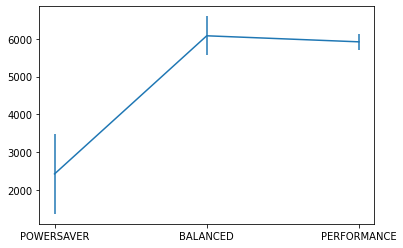

In [5]:
fig, ax = plt.subplots()

ax.errorbar(df_energy.mean().index, df_energy.mean().values, yerr=df_energy.std().values)

<ErrorbarContainer object of 3 artists>

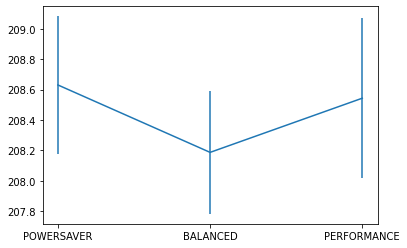

In [6]:
fig, ax = plt.subplots()

ax.errorbar(df_time.mean().index, df_time.mean().values, yerr=df_time.std().values)

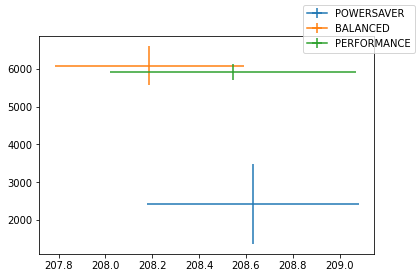

In [7]:
fig, ax = plt.subplots()

ax.errorbar(df_time['POWERSAVER'].mean(), 
            df_energy['POWERSAVER'].mean(), 
            xerr=df_time['POWERSAVER'].std(), 
            yerr=df_energy['POWERSAVER'].std()
           , label='POWERSAVER')

ax.errorbar(df_time['BALANCED'].mean(), 
            df_energy['BALANCED'].mean(), 
            xerr=df_time['BALANCED'].std(), 
            yerr=df_energy['BALANCED'].std()
           , label='BALANCED')

ax.errorbar(df_time['PERFORMANCE'].mean(), 
            df_energy['PERFORMANCE'].mean(), 
            xerr=df_time['PERFORMANCE'].std(), 
            yerr=df_energy['PERFORMANCE'].std(),
           label='PERFORMANCE')

fig.legend()

# Exploratory Analysis

<AxesSubplot:>

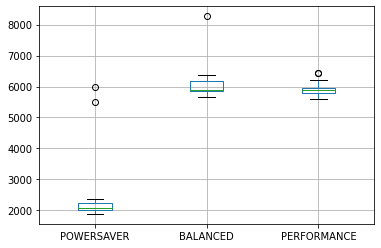

In [8]:
fig, ax = plt.subplots()

df_energy.boxplot(ax=ax)

<AxesSubplot:>

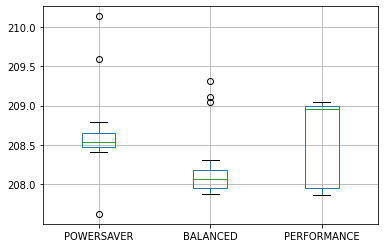

In [9]:
fig, ax = plt.subplots()

df_time.boxplot(ax=ax)

[Text(1.0, 0, 'POWERSAVER'),
 Text(2.0, 0, 'BALANCED'),
 Text(3.0, 0, 'PERFORMANCE')]

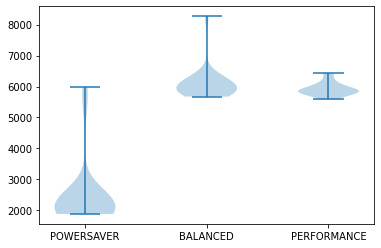

In [10]:
fig, ax = plt.subplots()

ax.violinplot([df_energy['POWERSAVER'].tolist(), df_energy['BALANCED'].tolist(), df_energy['PERFORMANCE'].tolist()])
ax.set_xticks([1.0,2.0,3.0]) 
ax.set_xticklabels(['POWERSAVER', 'BALANCED', 'PERFORMANCE'])

[Text(1.0, 0, 'POWERSAVER'),
 Text(2.0, 0, 'BALANCED'),
 Text(3.0, 0, 'PERFORMANCE')]

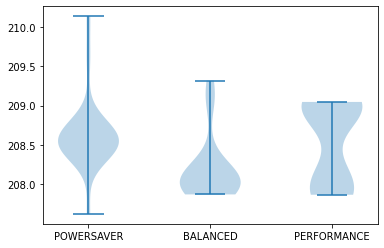

In [11]:
fig, ax = plt.subplots()

ax.violinplot([df_time['POWERSAVER'].tolist(), df_time['BALANCED'].tolist(), df_time['PERFORMANCE'].tolist()])
ax.set_xticks([1.0,2.0,3.0]) 
ax.set_xticklabels(['POWERSAVER', 'BALANCED', 'PERFORMANCE'])

<AxesSubplot:xlabel='PERFORMANCE', ylabel='Density'>

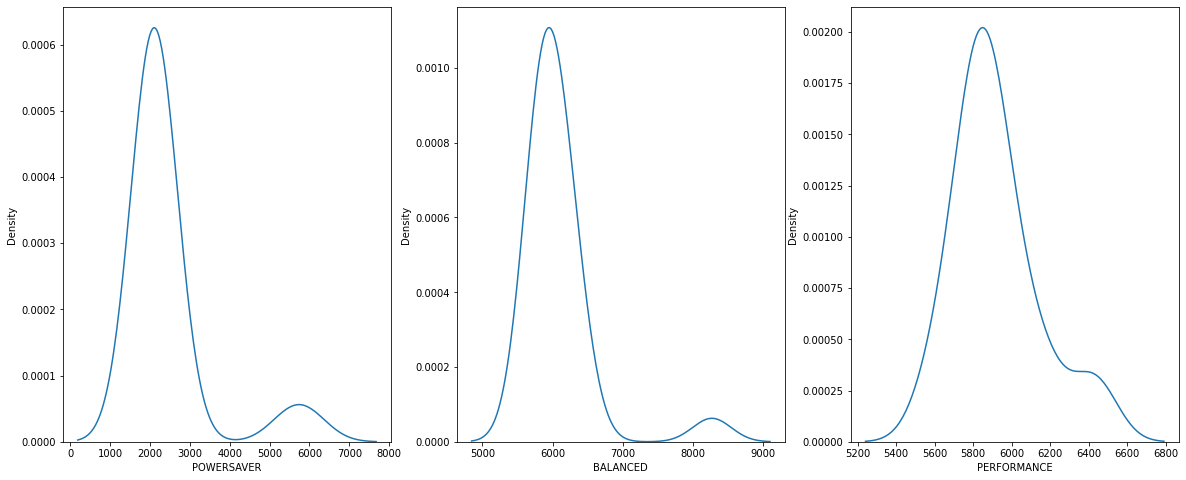

In [12]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

sns.kdeplot(df_energy['POWERSAVER'],ax=axs[0])
sns.kdeplot(df_energy['BALANCED'],ax=axs[1])
sns.kdeplot(df_energy['PERFORMANCE'],ax=axs[2])

<AxesSubplot:xlabel='PERFORMANCE', ylabel='Density'>

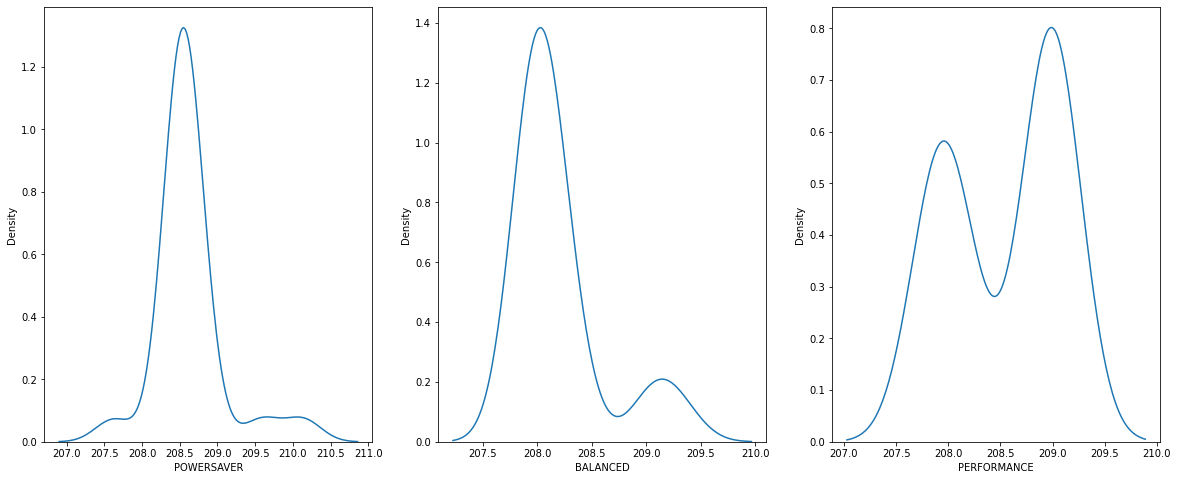

In [13]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

sns.kdeplot(df_time['POWERSAVER'],ax=axs[0])
sns.kdeplot(df_time['BALANCED'],ax=axs[1])
sns.kdeplot(df_time['PERFORMANCE'],ax=axs[2])

(array([2., 1., 7., 4., 4., 1., 1., 1., 0., 2.]),
 array([5590.69320661, 5675.81849318, 5760.94377976, 5846.06906633,
        5931.1943529 , 6016.31963948, 6101.44492605, 6186.57021263,
        6271.6954992 , 6356.82078578, 6441.94607235]),
 <BarContainer object of 10 artists>)

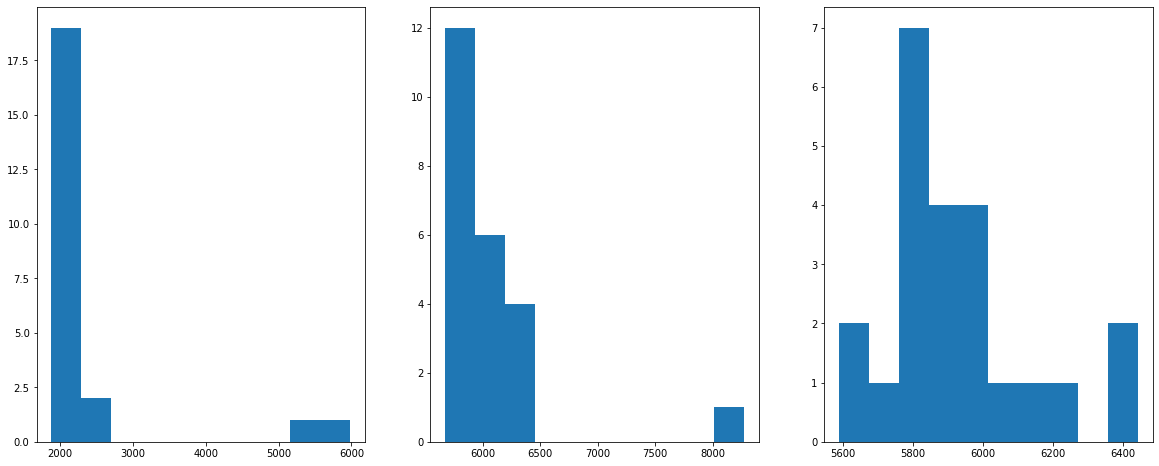

In [14]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

axs[0].hist(df_energy['POWERSAVER'])
axs[1].hist(df_energy['BALANCED'])
axs[2].hist(df_energy['PERFORMANCE'])

(array([ 7.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 13.]),
 array([207.8694849 , 207.98714993, 208.10481496, 208.22247999,
        208.34014502, 208.45781004, 208.57547507, 208.6931401 ,
        208.81080513, 208.92847016, 209.04613519]),
 <BarContainer object of 10 artists>)

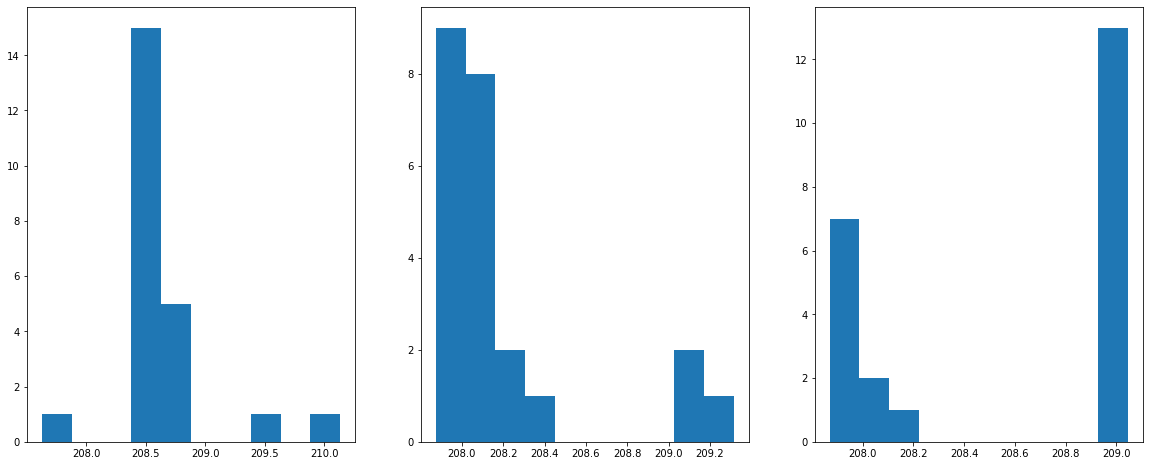

In [15]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

axs[0].hist(df_time['POWERSAVER'])
axs[1].hist(df_time['BALANCED'])
axs[2].hist(df_time['PERFORMANCE'])

## Shapiro-Wilk test (check normality)

In [16]:
from scipy.stats import *

In [17]:
p_saver = shapiro(df_energy['POWERSAVER'])[1]
p_balanced = shapiro(df_energy['BALANCED'])[1]
p_performance = shapiro(df_energy['PERFORMANCE'])[1]

for profile, p_value in zip(df_energy.columns, [p_saver, p_balanced, p_performance]):
    test = 'ARE' if p_value>=0.05 else 'ARE NOT'
    print(f'The energy values for {profile} {test} Normal, p-value={p_value}')

The energy values for POWERSAVER ARE NOT Normal, p-value=2.9680114366215093e-08
The energy values for BALANCED ARE NOT Normal, p-value=3.9754706904204795e-07
The energy values for PERFORMANCE ARE NOT Normal, p-value=0.030578646808862686


In [18]:
p_saver = shapiro(df_time['POWERSAVER'])[1]
p_balanced = shapiro(df_time['BALANCED'])[1]
p_performance = shapiro(df_time['PERFORMANCE'])[1]

for profile, p_value in zip(df_energy.columns, [p_saver, p_balanced, p_performance]):
    test = 'ARE' if p_value>=0.05 else 'ARE NOT'
    print(f'The time values for {profile} {test} Normal, p-value={p_value}')

The time values for POWERSAVER ARE NOT Normal, p-value=9.843468433246017e-06
The time values for BALANCED ARE NOT Normal, p-value=8.74495799507713e-06
The time values for PERFORMANCE ARE NOT Normal, p-value=2.233032682852354e-05


## Remove outliers

In [19]:
def remove_out_z_score(data):
    mean = data.mean()
    std = data.std()
    no_outliers = []
    for i in data:
        z = (i-mean)/std
        if z < 3:
            no_outliers.append(i)
    return no_outliers

In [21]:
energy_powersaver = remove_out_z_score(df_energy['POWERSAVER'])

energy_powersaver = np.array(energy_powersaver)
print(len(energy_powersaver))
p_saver=shapiro(energy_powersaver)[1]
p_saver

22


1.403247651410311e-08

In [22]:
energy_balanced = remove_out_z_score(df_energy['BALANCED'])

energy_balanced = np.array(energy_balanced)
print(len(energy_balanced))
p_balanced=shapiro(energy_balanced)[1]
p_balanced

22


0.12137472629547119

In [23]:
energy_performance = remove_out_z_score(df_energy['PERFORMANCE'])

energy_performance = np.array(energy_performance)
print(len(energy_performance))
p_performance=shapiro(energy_performance)[1]
p_performance

23


0.030578646808862686

In [25]:
time_powersaver = remove_out_z_score(df_time['POWERSAVER'])

time_powersaver = np.array(time_powersaver)
print(len(time_powersaver))
p_saver=shapiro(time_powersaver)[1]
p_saver

22


2.516409585950896e-05

In [26]:
time_balanced = remove_out_z_score(df_time['BALANCED'])

time_balanced = np.array(time_balanced)
print(len(time_balanced))
p_balanced=shapiro(time_balanced)[1]
p_balanced

23


8.74495799507713e-06

In [27]:
time_performance = remove_out_z_score(df_time['PERFORMANCE'])

time_performance = np.array(time_performance)
print(len(time_performance))
p_performance=shapiro(time_performance)[1]
p_performance

23


2.233032682852354e-05

We cannot remove any outliers (all are within three standard deviations). Therefore we conclude the data is not normal in the identified cases. This is expected since our experiments are AI executions.

# Statistical significance

All other comparasion will have at least one sample that is not normal therefore we will use from now on the Mann-Whitney U test

We compare the profile Powersaver with Balanced and Performance in terms of energy.

In [28]:
mannwhitneyu(df_energy['PERFORMANCE'], df_energy['BALANCED'], alternative='two-sided')

MannwhitneyuResult(statistic=201.0, pvalue=0.16634058119724848)

In [29]:
mannwhitneyu(df_energy['POWERSAVER'], df_energy['BALANCED'], alternative='two-sided')

MannwhitneyuResult(statistic=13.0, pvalue=3.502418980251719e-08)

In [30]:
mannwhitneyu(df_energy['POWERSAVER'], df_energy['PERFORMANCE'], alternative='two-sided')

MannwhitneyuResult(statistic=18.0, pvalue=6.501900873604789e-08)

Energy saving between performance and balanced are not statistically significant. In both other cases the p-value is less than 0.05 therefore the difference is statistically significant meaning the profile Powersaver is indeed more energy efficient.

### Check time 

In [31]:
mannwhitneyu(df_time['BALANCED'], df_time['PERFORMANCE'], alternative='two-sided')

MannwhitneyuResult(statistic=208.0, pvalue=0.21859447566334989)

In [32]:
mannwhitneyu(df_time['POWERSAVER'], df_time['BALANCED'], alternative='two-sided')

MannwhitneyuResult(statistic=446.0, pvalue=6.996002558072276e-05)

In [33]:
mannwhitneyu(df_time['POWERSAVER'], df_time['PERFORMANCE'], alternative='two-sided')

MannwhitneyuResult(statistic=246.0, pvalue=0.6925143199592534)

Only the time between powersaver and balanced is statistically significant.

# Effect Size

## Median Difference

### Energy

In [36]:
df_energy['BALANCED'].median() - df_energy['POWERSAVER'].median()

3834.934572060108

In [35]:
df_energy['PERFORMANCE'].median() - df_energy['POWERSAVER'].median()

3805.4570666623117

The difference in energy saving is very much.

### Time

In [37]:
df_time['POWERSAVER'].median() - df_time['BALANCED'].median()

0.4708404541015625

In this case the median does not show a huge difference in time.

## Percentage of pairs

In [38]:
import itertools 

def pair_percentage(data1, data2):
    pairs = list(itertools.product(data1.tolist(), data2.tolist()))

    supporting_pairs = 0
    for pair in pairs:
        if pair[0]>pair[1]:
            supporting_pairs+=1

    print(supporting_pairs/len(pairs))

### Energy

In [39]:
pair_percentage(df_energy['BALANCED'], df_energy['POWERSAVER'])

0.9754253308128544


In [40]:
pair_percentage(df_energy['PERFORMANCE'], df_energy['POWERSAVER'])

0.9659735349716446


The difference between powersaver and the other two profiles is confirmed to be significant since most pairs show that performance is more energy efficient than the other two profiles.

### Time

In [41]:
pair_percentage(df_time['POWERSAVER'], df_time['BALANCED'])

0.8431001890359168


We can see that the percentages are all above 50% supporting the median result. 

# Cliffs delta

In [42]:
def cliffs_delta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

## Energy

In [44]:
cliffs_delta(df_energy['BALANCED'].tolist(), df_energy['POWERSAVER'].tolist())

(0.9508506616257089, 'large')

In [45]:
cliffs_delta(df_energy['PERFORMANCE'].tolist(), df_energy['POWERSAVER'].tolist())

(0.9319470699432892, 'large')

## Time

In [46]:
cliffs_delta(df_time['POWERSAVER'].tolist(), df_time['BALANCED'].tolist())

(0.6862003780718336, 'large')